The Feast NeuralNetwork

In [40]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

Det er føste gang jeg prøver at lave et neuralt network fra screatch det vil følge strukturen fra bogen "Deep Learning for Coders with fastai and PyTorch". kapitel 4 afsnitn "Putting It All Together"

In [41]:
ds = L(enumerate(string.ascii_lowercase))
ds
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([ 5,  9,  8, 15,  4, 24]), ('f', 'j', 'i', 'p', 'e', 'y')),
 (tensor([ 0, 18, 12, 10,  6, 20]), ('a', 's', 'm', 'k', 'g', 'u')),
 (tensor([17, 16, 23, 13,  3, 14]), ('r', 'q', 'x', 'n', 'd', 'o')),
 (tensor([21, 22,  7, 19,  1,  2]), ('v', 'w', 'h', 't', 'b', 'c')),
 (tensor([11, 25]), ('l', 'z'))]

In [42]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

Først initilizere vi nogle parmetere der sakl bruges senere

In [43]:

path = untar_data(URLs.MNIST_SAMPLE)#Loding pictureas
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
weights = init_params((28*28,1))
bias = init_params(1)
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape
dset = list(zip(train_x,train_y))
#Validasion sæt
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [61]:
def linear1(xb): return xb@weights + bias

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

Efter vi har eniltilzerede parmeterne skal vi kunne hente data et sted fra dette kan vi gøre med DataLoader

In [44]:

dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

Efter følgende skal vi gennere vores data sæt

In [50]:
valid_dl = DataLoader(valid_dset, batch_size=256)
batch = train_x[:4] #Sættomg bach size
preds = linear1(batch)
loss = mnist_loss(preds, train_y[:4])
print(+ batch.shape)
print(preds)
print(loss)

torch.Size([4, 784])
tensor([[ 2.4931],
        [-3.6898],
        [ 3.5233],
        [ 3.4936]], grad_fn=<AddBackward0>)
tensor(0.2775, grad_fn=<MeanBackward0>)


In [51]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0056), tensor([-0.0377]))

In [54]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0112), tensor([-0.0754]))

In [55]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0169), tensor([-0.1131]))

In [56]:
weights.grad.zero_()
bias.grad.zero_();

In [58]:
(preds>0.0).float() == train_y[:4]

tensor([[ True],
        [False],
        [ True],
        [ True]])

In [ ]:
batch_accuracy(linear1(batch), train_y[:4])

In [62]:
validate_epoch(linear1)

0.5018

In [63]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6108

In [67]:
for i in range(1000):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.9829 0.9829 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9833 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9843 0.9843 0.9843 0.9843 0.9843 0.9843 0.9843 0.9843 0.9843 0.9843 0.9843 0.9843 0.9843 0.9843 0.9843 0.9843 0.9843 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838 0.9838

**Optimizer**\
Lad os forbedre demme kode og samle det hele i en klasse


In [68]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [89]:
linear_model = nn.Linear(28*28,1)
opt = BasicOptim(linear_model.parameters(), lr)
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [76]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [84]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [78]:
validate_epoch(linear_model)

0.6435

In [79]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [85]:
train_model(linear_model, 20)

0.4932 0.8428 0.8379 0.9121 0.9341 0.9487 0.9551 0.9629 0.9653 0.9688 0.9702 0.9722 0.9736 0.9751 0.9761 0.9761 0.9775 0.978 0.9785 0.979 

In [86]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.9175 0.8013 0.9048 0.9312 0.9453 0.9561 0.9619 0.9653 0.9673 0.9692 0.9722 0.9736 0.9751 0.9761 0.9761 0.9775 0.9775 0.978 0.9785 

In [87]:
dls = DataLoaders(dl, valid_dl)

In [90]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637053,0.503330,0.495584,00:00
1,0.467996,0.238659,0.785083,00:00
2,0.174241,0.159853,0.858194,00:00
3,0.077475,0.099507,0.918057,00:00
4,0.041785,0.074252,0.935231,00:00
5,0.027820,0.060183,0.948970,00:00
6,0.022062,0.051268,0.956330,00:00
7,0.019481,0.045279,0.963199,00:00
8,0.018156,0.041052,0.965653,00:00
9,0.017350,0.037928,0.968106,00:00


Adding a Nonlinearity

In [91]:
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [92]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


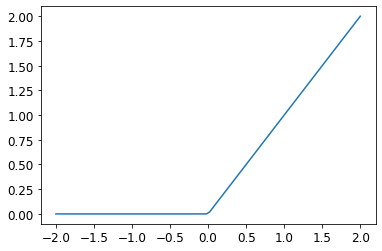

In [93]:
plot_function(F.relu)

In [94]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [95]:
learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [96]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.348119,0.402180,0.509323,00:00
1,0.157574,0.245312,0.782139,00:00
2,0.085546,0.120228,0.911678,00:00
3,0.055072,0.079731,0.940137,00:00
4,0.041131,0.061785,0.953876,00:00
5,0.034130,0.051823,0.963690,00:00
6,0.030181,0.045560,0.966143,00:00
7,0.027650,0.041290,0.967125,00:00
8,0.025843,0.038189,0.968597,00:00
9,0.024450,0.035828,0.969087,00:00


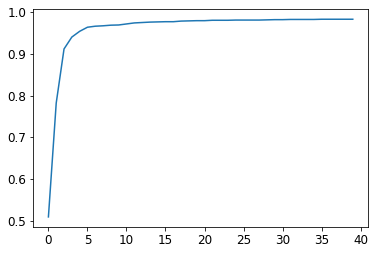

In [97]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [98]:
learn.recorder.values[-1][2]

0.982826292514801

In [99]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.084463,0.022732,0.992149,02:52
